### Load all handwritten digit

In [1]:
from utils import load_data

In [2]:
X_train, X_valid, X_test, y_train, y_valid, y_test = load_data("digits.npz")

### Compute covariance matrix

In [3]:
import numpy as np

In [4]:
S = np.cov(X_train.T, bias=True)

In [5]:
from numpy import linalg as LA

In [6]:
w, v = LA.eig(S)
arg_w = w.argsort()[::-1]
x = np.arange(1, w.shape[0] + 1)

### Plot the sorted eigen values

In [7]:
import matplotlib.pyplot as plt

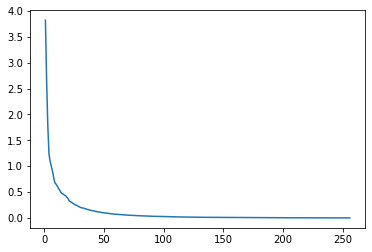

In [8]:
plt.plot(x, w[arg_w])

### Plot the first three eigen-images and mean

In [9]:
def plot_images(images, ax, ims_per_row=5, padding=5, digit_dimensions=(28, 28),
                cmap=plt.cm.binary, vmin=None, vmax=None):
    """Images should be a (N_images x pixels) matrix."""
    N_images = images.shape[0]
    N_rows = np.int32(np.ceil(float(N_images) / ims_per_row))
    pad_value = np.min(images.ravel())
    concat_images = np.full(((digit_dimensions[0] + padding) * N_rows + padding,
                             (digit_dimensions[1] + padding) * ims_per_row + padding), pad_value)
    for i in range(N_images):
        cur_image = np.reshape(images[i, :], digit_dimensions, order='F')
        row_ix = i // ims_per_row
        col_ix = i % ims_per_row
        row_start = padding + (padding + digit_dimensions[0]) * row_ix
        col_start = padding + (padding + digit_dimensions[1]) * col_ix
        concat_images[row_start: row_start + digit_dimensions[0],
                      col_start: col_start + digit_dimensions[1]] = cur_image
    cax = ax.matshow(concat_images, cmap=cmap, vmin=vmin, vmax=vmax)
    return cax

In [10]:
# Get the first three eigen vectors
first_3 = v[:,arg_w[:3]].T

In [11]:
first_3.shape

(3, 256)

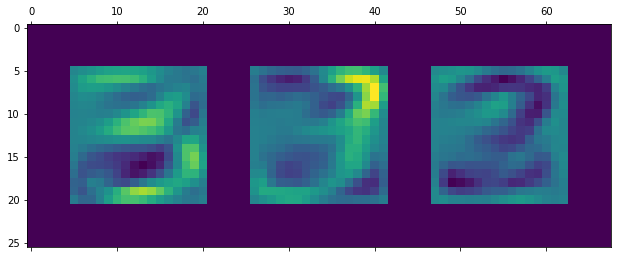

In [12]:
%matplotlib inline
plot_images(first_3, plt, ims_per_row=3, digit_dimensions=(16, 16), cmap='viridis')

In [13]:
# Derive the mean
mean = np.mean(X_train, axis=0)

In [14]:
mean.shape

(256,)

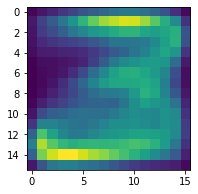

In [15]:
plt.figure(figsize = (10,3))
plt.imshow(mean.reshape((16, 16), order='F'))

### Q3 (a) Derive the code vectors

In [16]:
def predict_1NN(X_train, y_train, X):
    nn = []
    for x in X:
        nn.append(LA.norm(X_train - x, axis=1).argmin())
    return y_train[nn]

In [17]:
def accuracy(y_predict, y):
    return np.sum(y_predict == y) / float(len(y))

In [18]:
# Initialize all dimensions
dims = [2, 5, 10, 20, 30]
acc = []

### Train with 1NN on the code vectors

In [19]:
for dim in dims:
    # Center the data
    Xt_c, Xv_c = X_train - mean, X_valid - mean
    # Project on lower dimensional space
    basis = v[:, arg_w[: dim]]
    Xt_l, Xv_l = Xt_c @ basis, Xv_c @ basis
    # Predict the labels of validation set
    yv_predict = predict_1NN(Xt_l, y_train, Xv_l)
    # Evaluate performance
    acc.append(accuracy(yv_predict, y_valid))

### Plot the performances with respect to dimensions

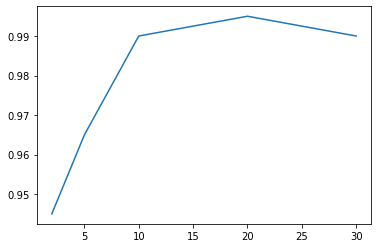

In [20]:
%matplotlib inline
plt.plot(dims, acc)

### Q3 (b)

I would choose 20 top eigenvectors, since it reduces the dimensions of the features from 30 to 20. It reduces the cost of the training process and at the same time achieves the highest score on the validation set.

### Q3 (c)

In [21]:
# Center the data
Xtest_c = X_test - mean
# Project on lower dimensional space
basis = v[:, arg_w[: 20]]
Xtest_l, Xt_l = Xtest_c @ basis, Xt_c @ basis
# Predict the labels of validation set
yt_predict = predict_1NN(Xt_l, y_train, Xtest_l)

### Performance of the final classifier

In [22]:
accuracy(yt_predict, y_test)

0.99